# Title - EDA Questions

## Is there a correlation between Studio,Genre and Rating.

## How does series runtime vary over time for tv and movies (analyse seperately)

# Setup

## Modules

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

sns.set_palette("Set3")

## Functions

In [29]:
def univariate_numerical_analysis(numerical_frame: pd.DataFrame ,column:str, new_index:str):
    
    numerical_data = numerical_frame.loc[:,column]

    mean_val = round(numerical_data.mean(),2)
    median_val = round(numerical_data.median(),2)
    std_val = round(numerical_data.std(),2)
    range_val = round(numerical_data.max() - numerical_data.min(),2)  
    iqr_val = round(numerical_data.quantile(0.75)-numerical_data.quantile(0.25),2)
    skew_val = round(numerical_data.skew(),2)
    kurtosis_val = round(numerical_data.kurtosis(),2)
    coefficient_of_variance_val = round(((std_val / mean_val) if mean_val != 0 else 0),2) 
    mode_val = numerical_data.mode().tolist()    
    mode_val_string = ""

    for _ in mode_val:
        mode_val_string += str(format(_, ".2f")) + ","



    output_frame = pd.DataFrame(
        {"Mean": [mean_val],
         "Median": [median_val],
         "Mode": [mode_val],
         "Standard Deviation": [std_val],
         "Range": [range_val],
         "Inter-Quartile Range": [iqr_val],
         "Skewness": [skew_val],
         "Kurtosis": [kurtosis_val],
         "Coefficient of Variance": [coefficient_of_variance_val]})
    output_frame.index = [new_index]
   
    return(output_frame)

In [30]:
def iqr_outlier_strip(numerical_frame: pd.DataFrame,column:str):
    
    q1 = np.percentile(numerical_frame[column], 25)
    q3 = np.percentile(numerical_frame[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = (numerical_frame[column] < lower_bound) | (numerical_frame[column] > upper_bound)

    numerical_frame_filtered = numerical_frame[~outlier_mask]

    return(numerical_frame_filtered)

## Loading Data

In [31]:
df = pd.read_csv("Top_Anime_data.csv")

df.columns = [columns.lower().replace(" ", "_") for columns in df.columns]   ### Anti-whitespace pro snake_case

## Data Inspection

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   score        1000 non-null   float64
 1   popularity   1000 non-null   int64  
 2   rank         1000 non-null   int64  
 3   members      1000 non-null   int64  
 4   description  1000 non-null   object 
 5   synonyms     709 non-null    object 
 6   japanese     999 non-null    object 
 7   english      859 non-null    object 
 8   type         1000 non-null   object 
 9   episodes     1000 non-null   object 
 10  status       1000 non-null   object 
 11  aired        1000 non-null   object 
 12  premiered    569 non-null    object 
 13  broadcast    569 non-null    object 
 14  producers    1000 non-null   object 
 15  licensors    1000 non-null   object 
 16  studios      1000 non-null   object 
 17  source       1000 non-null   object 
 18  genres       771 non-null    object 
 19  demogra

filtering df by data type so data inspectionis easier

In [33]:
cat = df.select_dtypes(exclude="number")
cat_columns = list(cat.columns)
print(f"The categorical columns of the cat dataframe are :{cat_columns}")

The categorical columns of the cat dataframe are :['description', 'synonyms', 'japanese', 'english', 'type', 'episodes', 'status', 'aired', 'premiered', 'broadcast', 'producers', 'licensors', 'studios', 'source', 'genres', 'demographic', 'duration', 'rating']


In [34]:
num = df.select_dtypes(include="number")
num_columns = list(num.columns)
print(f"The numerical columns of num dataframe are :{num_columns}")

The numerical columns of num dataframe are :['score', 'popularity', 'rank', 'members']


### Numeric data check 1

In [35]:
num_non_null_columns =num.notnull().sum()
num_non_null_total = num.notnull().sum().sum()
num_non_null_percentage_column = num.notnull().sum() / len(num)
num_non_null_percentage_total = (num.notnull().sum().sum()) / (num.size)
                                                                            # Count of non-missing values per column:

num_dup = num.duplicated()
num_dup_total = num.duplicated().sum()                                      # One fewer sum as duplicated returns series not a frame
num_na_columns = num.isna().sum()             
num_na_total = num.isna().sum().sum()

print(f"""
number of non-null values in the frame of numeric data: {num_non_null_total},
number of non-null values by column: \n\n{num_non_null_columns}\n

precentage of non-null values in the frame of numeric data: {num_non_null_percentage_total * 100},
precentage of non-null values by column: \n\n{num_non_null_percentage_column * 100}
      
number of duplicates in the frame of numeric data: {num_dup_total},

number of null values in the frame of numeric data:{num_na_total},
number of null values by column:\n\n{num_na_columns}\n""")

print(f"The following rows are duplicates: {','.join(num[num_dup].index )}") # num_dup is a boolean series which acts as a filter condition
print(f"The following columns have null values: {','.join(num_na_columns[num_na_columns > 0].index)}")



number of non-null values in the frame of numeric data: 4000,
number of non-null values by column: 

score         1000
popularity    1000
rank          1000
members       1000
dtype: int64


precentage of non-null values in the frame of numeric data: 100.0,
precentage of non-null values by column: 

score         100.0
popularity    100.0
rank          100.0
members       100.0
dtype: float64

number of duplicates in the frame of numeric data: 0,

number of null values in the frame of numeric data:0,
number of null values by column:

score         0
popularity    0
rank          0
members       0
dtype: int64

The following rows are duplicates: 
The following columns have null values: 


### Categoric data check 1

In [36]:
##.strip() on cat

stripped = lambda _: _.strip() if isinstance(_, str) else _
cat = cat.map(stripped)

##

cat_non_null_columns = cat.notnull().sum()
cat_non_null_total = cat.notnull().sum().sum()
cat_non_null_percentage_column = cat.notnull().sum() / len(cat)
cat_non_null_percentage_total = (cat.notnull().sum().sum()) / (cat.size)
                                                                            # Count of non-missing values per column:

cat_dup = cat.duplicated()
cat_dup_total = cat.duplicated().sum()                                      # One fewer sum as duplicated returns series not a frame
cat_na_columns = cat.isna().sum()             
cat_na_total = cat.isna().sum().sum()

#cat_spaced_values_total_old = cat.eq(" ").sum().sum()                      # Old basic whitespace detector

cat_spaced_values_columns = cat.astype(str).apply(lambda _ : _.str.match(r'^\s*$')).sum() 
cat_spaced_values_total = cat.astype(str).apply(lambda _ : _.str.match(r'^\s*$')).sum().sum() 

# Treats every column as data type string, and for every column applies the check that it is not continuos whitespace using the regex
# expression r'^\s*$' and the str.match() method. ^ indicates the start, \s*checks for coninuos whitespace, and $indicates the end of the expression. 

print(f"""
number of non-null values in the frame of categoric data: {cat_non_null_total},
number of non-null values by column: \n\n{cat_non_null_columns}

percentage of non-null values in the frame of categoric data: {cat_non_null_percentage_total * 100},
percentage of non-null values by column: \n\n{cat_non_null_percentage_column * 100}

number of duplicates in the frame of categoric data: {cat_dup_total},

number of white space values in the frame of categoric data: {cat_spaced_values_total},
number of white space values by column: \n\n{cat_spaced_values_columns}

number of null values in the frame of categoric data:{cat_na_total},
number of null values by column:\n\n{cat_na_columns}\n""")

print(f"The following rows are duplicates: {','.join(cat[cat_dup].index )}") # cat_dup is a boolean series which acts as a filter condition
print(f"The following columns have null values: {','.join(cat_na_columns[cat_na_columns > 0].index)}")



number of non-null values in the frame of categoric data: 15997,
number of non-null values by column: 

description    1000
synonyms        709
japanese        999
english         859
type           1000
episodes       1000
status         1000
aired          1000
premiered       569
broadcast       569
producers      1000
licensors      1000
studios        1000
source         1000
genres          771
demographic     521
duration       1000
rating         1000
dtype: int64

percentage of non-null values in the frame of categoric data: 88.87222222222222,
percentage of non-null values by column: 

description    100.0
synonyms        70.9
japanese        99.9
english         85.9
type           100.0
episodes       100.0
status         100.0
aired          100.0
premiered       56.9
broadcast       56.9
producers      100.0
licensors      100.0
studios        100.0
source         100.0
genres          77.1
demographic     52.1
duration       100.0
rating         100.0
dtype: float64

num

## Data Formatting

### Making episodes column numeric

All null values set to zero, the zeros can be dropped later if needed.

In [37]:
df["episodes"] = pd.to_numeric(df["episodes"], errors = "coerce").fillna(0).astype(int)             #null values saved as zero


### Air dates and time on air

In [38]:
first_last = df["aired"].astype(str).str.split(" to ", n=1, expand=True)        # first_last is a new dataframe that takes each result from the split as a new column


df["aired_first"] = first_last[0].str.strip()
df["aired_last"]  = ( 
    first_last[1]
    .str.strip()
    .replace("?","Dec 31, 2024")                                                #dataset is for anime in 2024 and made in january 2025, Dec 31, 2024 is being used as end date of dataframe
    if first_last.shape[1] > 1 else pd.NA
    )

## .partion() caused so many problems, sometimes fancy speciifc functions are not worth it

# df[["japanese","aired_first","aired_last"]].head(50)                          # Entry 50 one piece is proof this worked

In [39]:
df["aired_first"] = pd.to_datetime(df["aired_first"], format="%b %d, %Y")
df["aired_last"] = pd.to_datetime(df["aired_last"], format="%b %d, %Y")

df["years_on_air"] = (df["aired_last"] - df["aired_first"]).dt.days / 365

# df[["aired_first","aired_last","years_on_air"]].head(50)  

Studios

In [40]:
## Maybe its better to store studios in list, because we can still access the studios via index. Keeping studios as a list is the only option
## as the number of unique values of studio is so much larger than genre, and also we are not planning on running correlation testing on studios. 

df["studios"] = (
    df["studios"]
    .str.split(",")
    .apply(lambda lst: [_.strip() for _ in lst]))

### example way can be used to find indexes that contain a studio

# mask = df["studios"].apply(lambda _: "Studio Ghibli" in _)        
# df_ghibli = df[mask]


# ghibli_production_count =  df_ghibli.shape[0]
# ghibli_production_count


In [41]:
# a.union(b) returns a set containing all unique elements of a and b. only a need to be a set
# so we can use an empty set and df[*studios] (* unpacks studios, so each list is acted on not the series),

list_unique_studios = set().union(*df["studios"])
list_unique_studios

{'8bit',
 'A-1 Pictures',
 'A.C.G.T.',
 'ABJ COMPANY',
 'AHA Entertainment',
 'AIC',
 'AIC ASTA',
 'APPP',
 'Actas',
 'Ajia-do',
 'Animation Do',
 'Artland',
 'B.CMAY PICTURES',
 'BUG FILMS',
 'Bandai Namco Pictures',
 'Bee Train',
 'Bibury Animation Studios',
 'Bones',
 "Brain's Base",
 'C-Station',
 'C2C',
 'CLAP',
 'Cloud Hearts',
 'CloverWorks',
 'CoMix Wave Films',
 'Colored Pencil Animation',
 'CygamesPictures',
 'DandeLion Animation Studio',
 'David Production',
 'Doga Kobo',
 'Drive',
 'E&G Films',
 'Egg Firm',
 'Encourage Films',
 'Fenz',
 'Flat Studio',
 'Gainax',
 'Gallop',
 'Geek Toys',
 'Geno Studio',
 'GoHands',
 'Gonzo',
 'Graphinica',
 'Group TAC',
 'HAL Film Maker',
 'HMCH',
 'HORNETS',
 'Haoliners Animation League',
 'Hololive Production',
 'Hoods Entertainment',
 'Imagin',
 'J.C.Staff',
 'K-Factory',
 'Khara',
 'Kinema Citrus',
 'Kitty Film Mitaka Studio',
 'Kyoto Animation',
 'LAN Studio',
 'LIDENFILMS',
 'Lapin Track',
 'Lay-duce',
 'Lerche',
 'M.S.C',
 'MAPPA',
 '

### Splitting genres into genres_list

In [42]:
tmp = (                             #tmp as we are only doing this to get a genres list
    df["genres"]
    .astype(str)
    .str.split(",")
    .explode()                      # new rows for each new unique value 
    .str.strip()                    # hidden whitespace destroyer so string slicing doesn't miscount
    .replace({"nan": pd.NA})        # gets rid of nan, the only "genre" that doesn't repeat so isnt affected the same way by the filter
    .dropna())

tmp = sorted(tmp.unique().tolist())

genres_list = []

for _ in tmp:
    genres_list.append(_[0:(len(_)//2)]) # Removes the duplicated words.

# print(genres_list)

Assigning Genres

In [43]:
def genre_assignment(dataframe):
    for i in genres_list:
        df[i] = df["genres"].str.contains(i)

genre_assignment(df)

## below is a really dirty fix for removing rows that have no genre as none of the methods were working directly on genres.
## but it works as the only possible values for rows that had anything in the genres column are True of False. NaN reveals an orignally empty genres column.

df = df[~df["Horror"].isna()] 
df.drop(columns = ["genres"])                   #"genres" is no longer needed


,score,popularity,rank,members,description,synonyms,japanese,english,type,episodes,...,Girls Love,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,False,False,False,False,False,False,False,False,False,False
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,False,False,False,False,False,False,False,False,False,False
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,False,False,False,False,False,True,False,False,False,True
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,False,False,False,False,False,True,False,False,False,False
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,7.80,764,994,312,"For young witches everywhere, the world-renown...","Wakate Animator Ikusei Project, 2012 Young Ani...",リトルウィッチアカデミア,NaN,Movie,1,...,False,False,False,False,False,False,False,False,False,False
995,7.80,4003,996,31,Half retelling of the original Frontier series...,"Macross Frontier the Movie, Gekijouban Macross...",劇場版 マクロスＦ 虚空歌姫 ～イツワリノウタヒメ～,Macross Frontier: The False Songstress,Movie,1,...,False,False,False,False,True,True,False,False,False,False
996,7.80,1658,997,136,"Not so long ago, mysterious structures called ...",Magi: Adventure of Sinbad OVA,マギ シンドバッドの冒険,NaN,OVA,5,...,False,False,False,False,False,False,False,False,False,False
997,7.80,3114,998,50,Fifteen years ago in a barren stretch of the P...,NaN,名探偵コナン 水平線上の陰謀,Detective Conan Movie 09: Strategy Above the D...,Movie,1,...,False,False,False,True,False,False,False,False,False,False


### Replacing null English names with Japanese Name.

In [44]:
df["name"] = df["english"].fillna(df["japanese"])

### moving name to the front of the dataframe

df = df[["name"] + [c for c in df.columns if c != "name"]]

df[~df["name"].isnull()] # there is one entry that just wont be removed with .dropna()


,name,score,popularity,rank,members,description,synonyms,japanese,english,type,...,Girls Love,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,Frieren: Beyond Journey's End,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,...,False,False,False,False,False,False,False,False,False,False
1,Fullmetal Alchemist: Brotherhood,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,...,False,False,False,False,False,False,False,False,False,False
2,Steins;Gate,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,...,False,False,False,False,False,True,False,False,False,True
3,Gintama Season 4,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,...,False,False,False,False,False,True,False,False,False,False
4,Attack on Titan Season 3 Part 2,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,リトルウィッチアカデミア,7.80,764,994,312,"For young witches everywhere, the world-renown...","Wakate Animator Ikusei Project, 2012 Young Ani...",リトルウィッチアカデミア,NaN,Movie,...,False,False,False,False,False,False,False,False,False,False
995,Macross Frontier: The False Songstress,7.80,4003,996,31,Half retelling of the original Frontier series...,"Macross Frontier the Movie, Gekijouban Macross...",劇場版 マクロスＦ 虚空歌姫 ～イツワリノウタヒメ～,Macross Frontier: The False Songstress,Movie,...,False,False,False,False,True,True,False,False,False,False
996,マギ シンドバッドの冒険,7.80,1658,997,136,"Not so long ago, mysterious structures called ...",Magi: Adventure of Sinbad OVA,マギ シンドバッドの冒険,NaN,OVA,...,False,False,False,False,False,False,False,False,False,False
997,Detective Conan Movie 09: Strategy Above the D...,7.80,3114,998,50,Fifteen years ago in a barren stretch of the P...,NaN,名探偵コナン 水平線上の陰謀,Detective Conan Movie 09: Strategy Above the D...,Movie,...,False,False,False,True,False,False,False,False,False,False


### Epsiodes & Runtime (total runtime)

In [ ]:
def runtime(string):

    "Not pretty but does what it needs to, more robust version would require regex, and is less dangerous than eval()"

    string = string.replace(" per ep.","")
    string = string.split()

    num_list = []

    for _ in string:
        if "hr."in _ or "min." in _:
            if "hr." in _:                
                num_list.append(int(_.replace("hr.","60")))
            if "min." in _: 
                num_list.append(int(_.replace("min.","1")))
        else:
            num_list.append(int(_))

    term_1 = np.prod(num_list[0:2]) if len(num_list) >= 2 else 0            #all of this bcause np.prod([]) == 1, leading to total runtime off by a hould episode length
    term_2 = np.prod(num_list[2:4]) if len(num_list) >= 4 else 0

    total_minutes = term_1 + term_2

    return(total_minutes)

runtime("24 min. per ep.")
runtime("1 hr. 17 min.")

['24', 'min.']
['1', 'hr.', '17', 'min.']


np.int64(77)

In [47]:
df["total_runtime_minutes"] = df["duration"].apply(runtime) * df["episodes"]
df[["duration","episodes","total_runtime_minutes"]]


,duration,episodes,total_runtime_minutes
0,24 min. per ep.,28,672
1,24 min. per ep.,64,1536
2,24 min. per ep.,24,576
3,24 min. per ep.,51,1224
4,23 min. per ep.,10,230
...,...,...,...
993,26 min.,1,26
995,1 hr. 59 min.,1,119
996,24 min. per ep.,5,120
997,1 hr. 50 min.,1,110


### Testing if can extract year from first airdate

In [48]:
df["aired_first"].dt.year

0      2023
1      2009
2      2011
3      2015
4      2019
       ... 
993    2013
995    2009
996    2014
997    2005
998    2008
Name: aired_first, Length: 771, dtype: int32

## Data Inspection Again

In [49]:
# reapplying the snake_case formatting as new columns have been added

df.columns = [columns.lower().replace(" ", "_") for columns in df.columns]   ### Anti-whitespace pro snake_case

In [50]:
cat = df.select_dtypes(exclude="number")

cat = cat.drop(columns="studios")                                       # only doing this because the category test can not handle series that contain lists

cat_columns = list(cat.columns)
print(f"The categorical columns of the cat dataframe are :{cat_columns}")


The categorical columns of the cat dataframe are :['name', 'description', 'synonyms', 'japanese', 'english', 'type', 'status', 'aired', 'premiered', 'broadcast', 'producers', 'licensors', 'source', 'genres', 'demographic', 'duration', 'rating', 'aired_first', 'aired_last', 'action', 'adventure', 'avant_garde', 'award_winning', 'boys_love', 'comedy', 'drama', 'ecchi', 'fantasy', 'girls_love', 'gourmet', 'horror', 'mystery', 'romance', 'sci-fi', 'slice_of_life', 'sports', 'supernatural', 'suspense']


In [51]:
num = df.select_dtypes(include="number")
num_columns = list(num.columns)
print(f"The numerical columns of num dataframe are :{num_columns}")


The numerical columns of num dataframe are :['score', 'popularity', 'rank', 'members', 'episodes', 'years_on_air', 'total_runtime_minutes']


### Numeric Data Check again

In [52]:
num_non_null_columns =num.notnull().sum()
num_non_null_total = num.notnull().sum().sum()
num_non_null_percentage_column = num.notnull().sum() / len(num)
num_non_null_percentage_total = (num.notnull().sum().sum()) / (num.size)
                                                                            # Count of non-missing values per column:

num_dup = num.duplicated()
num_dup_total = num.duplicated().sum()                                      # One fewer sum as duplicated returns series not a frame
num_na_columns = num.isna().sum()             
num_na_total = num.isna().sum().sum()

print(f"""
number of non-null values in the frame of numeric data: {num_non_null_total},
number of non-null values by column: \n\n{num_non_null_columns}\n

precentage of non-null values in the frame of numeric data: {num_non_null_percentage_total * 100},
precentage of non-null values by column: \n\n{num_non_null_percentage_column * 100}
      
number of duplicates in the frame of numeric data: {num_dup_total},

number of null values in the frame of numeric data:{num_na_total},
number of null values by column:\n\n{num_na_columns}\n""")

print(f"The following rows are duplicates: {','.join(num[num_dup].index )}") # num_dup is a boolean series which acts as a filter condition
print(f"The following columns have null values: {','.join(num_na_columns[num_na_columns > 0].index)}")



number of non-null values in the frame of numeric data: 5142,
number of non-null values by column: 

score                    771
popularity               771
rank                     771
members                  771
episodes                 771
years_on_air             516
total_runtime_minutes    771
dtype: int64


precentage of non-null values in the frame of numeric data: 95.27515286270149,
precentage of non-null values by column: 

score                    100.00000
popularity               100.00000
rank                     100.00000
members                  100.00000
episodes                 100.00000
years_on_air              66.92607
total_runtime_minutes    100.00000
dtype: float64

number of duplicates in the frame of numeric data: 0,

number of null values in the frame of numeric data:255,
number of null values by column:

score                      0
popularity                 0
rank                       0
members                    0
episodes                   0
years_o

### Catergoric Data Check again

In [53]:
##.strip() on cat

stripped = lambda _: _.strip() if isinstance(_, str) else _
cat = cat.map(stripped)

##

cat_non_null_columns = cat.notnull().sum()
cat_non_null_total = cat.notnull().sum().sum()
cat_non_null_percentage_column = cat.notnull().sum() / len(cat)
cat_non_null_percentage_total = (cat.notnull().sum().sum()) / (cat.size)
                                                                            # Count of non-missing values per column:

cat_dup = cat.duplicated()
cat_dup_total = cat.duplicated().sum()                                      # One fewer sum as duplicated returns series not a frame
cat_na_columns = cat.isna().sum()             
cat_na_total = cat.isna().sum().sum()

#cat_spaced_values_total_old = cat.eq(" ").sum().sum()                      # Old basic whitespace detector

cat_spaced_values_columns = cat.astype(str).apply(lambda _ : _.str.match(r'^\s*$')).sum() 
cat_spaced_values_total = cat.astype(str).apply(lambda _ : _.str.match(r'^\s*$')).sum().sum() 

# Treats every column as data type string, and for every column applies the check that it is not continuos whitespace using the regex
# expression r'^\s*$' and the str.match() method. ^ indicates the start, \s*checks for coninuos whitespace, and $indicates the end of the expression. 

print(f"""
number of non-null values in the frame of categoric data: {cat_non_null_total},
number of non-null values by column: \n\n{cat_non_null_columns}

percentage of non-null values in the frame of categoric data: {cat_non_null_percentage_total * 100},
percentage of non-null values by column: \n\n{cat_non_null_percentage_column * 100}

number of duplicates in the frame of categoric data: {cat_dup_total},

number of white space values in the frame of categoric data: {cat_spaced_values_total},
number of white space values by column: \n\n{cat_spaced_values_columns}

number of null values in the frame of categoric data:{cat_na_total},
number of null values by column:\n\n{cat_na_columns}\n""")

print(f"The following rows are duplicates: {','.join(cat[cat_dup].index )}") # cat_dup is a boolean series which acts as a filter condition
print(f"The following columns have null values: {','.join(cat_na_columns[cat_na_columns > 0].index)}")



number of non-null values in the frame of categoric data: 27647,
number of non-null values by column: 

name             770
description      771
synonyms         546
japanese         770
english          681
type             771
status           771
aired            771
premiered        426
broadcast        426
producers        771
licensors        771
source           771
genres           771
demographic      382
duration         771
rating           771
aired_first      771
aired_last       516
action           771
adventure        771
avant_garde      771
award_winning    771
boys_love        771
comedy           771
drama            771
ecchi            771
fantasy          771
girls_love       771
gourmet          771
horror           771
mystery          771
romance          771
sci-fi           771
slice_of_life    771
sports           771
supernatural     771
suspense         771
dtype: int64

percentage of non-null values in the frame of categoric data: 94.36480305822923,
pe

## Data Cleaning

### Dropping useless columns

In [54]:
columns_to_drop_cat = ["description","synonyms","premiered","broadcast","demographic","japanese","english","producers","licensors","genres","aired"]
columns_to_drop_num = ["popularity","members"]
columns_to_drop_df = columns_to_drop_cat + columns_to_drop_num
anime = df.drop(columns = columns_to_drop_df)
anime.info()

# anime["award_winning"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 0 to 998
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   770 non-null    object        
 1   score                  771 non-null    float64       
 2   rank                   771 non-null    int64         
 3   type                   771 non-null    object        
 4   episodes               771 non-null    int64         
 5   status                 771 non-null    object        
 6   studios                771 non-null    object        
 7   source                 771 non-null    object        
 8   duration               771 non-null    object        
 9   rating                 771 non-null    object        
 10  aired_first            771 non-null    datetime64[ns]
 11  aired_last             516 non-null    datetime64[ns]
 12  years_on_air           516 non-null    float64       
 13  action    

### Removing outliers

can be done on-the-fly with the iqr_outlier_strip() function

# Exploration

## Univariate

### How does series runtime vary over time for tv and movies (analyse seperately)

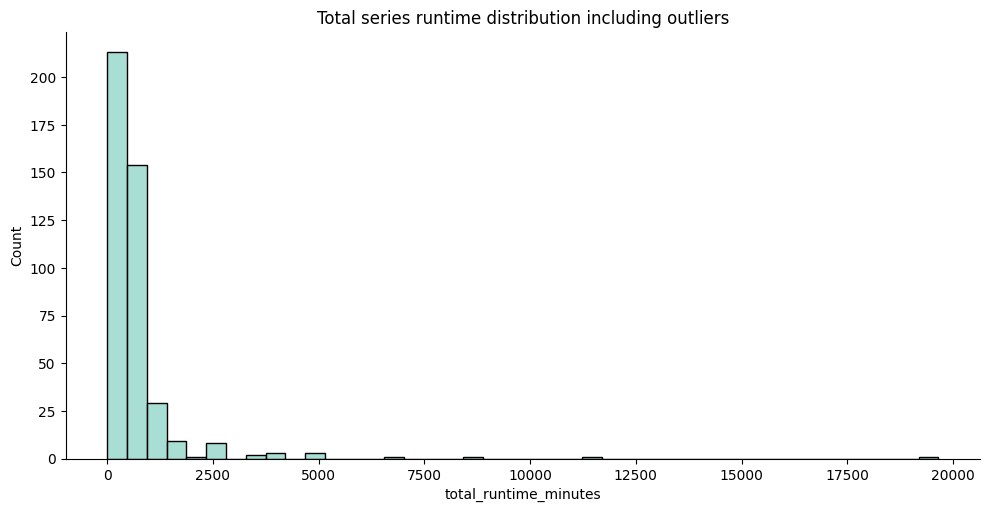

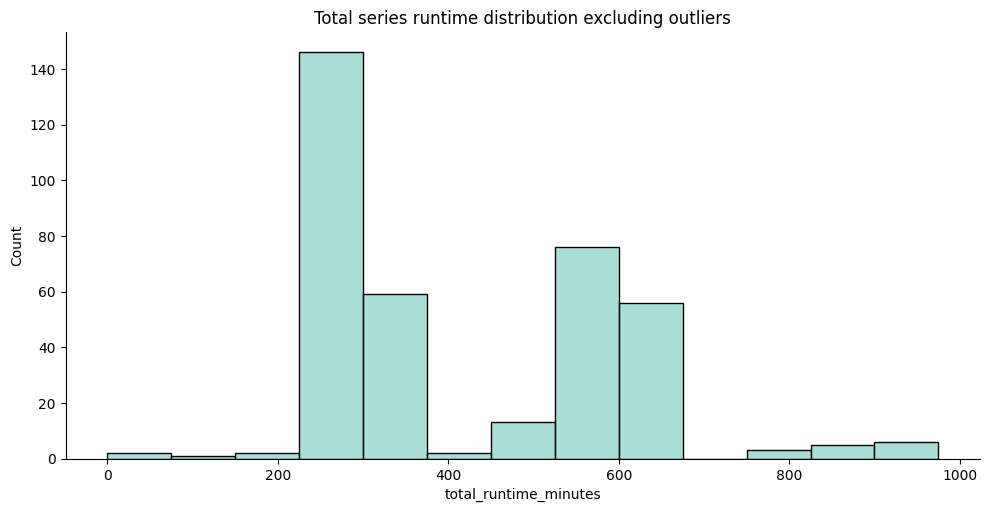

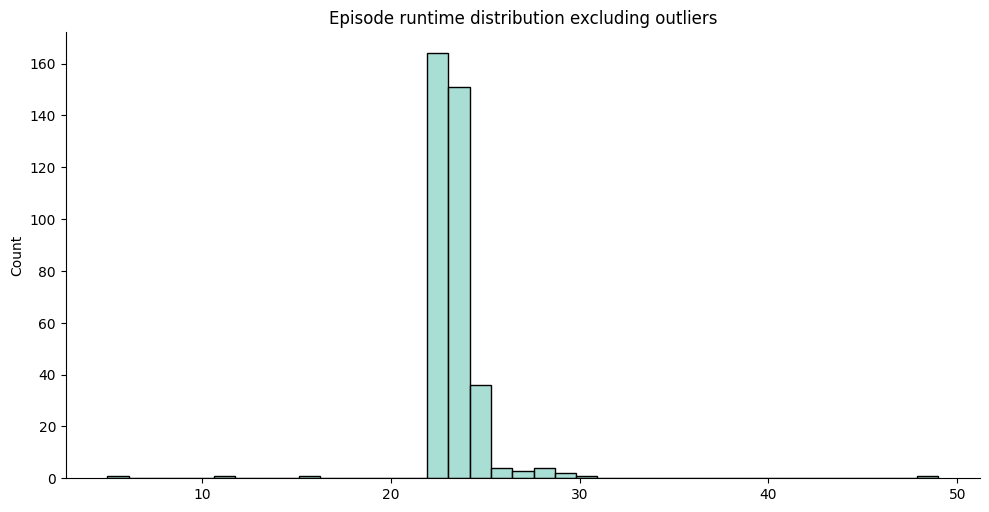

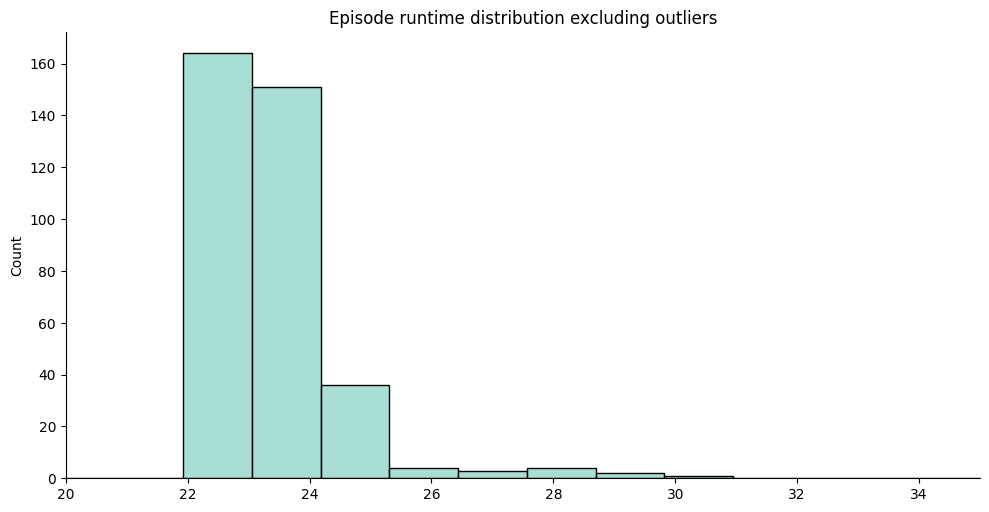

In [55]:
anime_tv_runtime = anime[anime["type"] == "TV"]

anime_tv_runtime_filtered = iqr_outlier_strip(anime_tv_runtime,"total_runtime_minutes")

sns.displot(anime_tv_runtime["total_runtime_minutes"], height = 5, aspect = 2)
plt.title("Total series runtime distribution including outliers")

sns.displot(anime_tv_runtime_filtered["total_runtime_minutes"],height = 5, aspect = 2)
plt.title("Total series runtime distribution excluding outliers")

sns.displot(anime_tv_runtime_filtered["total_runtime_minutes"] / anime_tv_runtime_filtered["episodes"],height = 5, aspect = 2)
plt.title("Episode runtime distribution excluding outliers")

sns.displot(anime_tv_runtime_filtered["total_runtime_minutes"] / anime_tv_runtime_filtered["episodes"],height = 5, aspect = 2)
plt.title("Episode runtime distribution excluding outliers")
plt.xlim(20,35)

plt.show()

Text(0.5, 1.0, 'Movie runtime distribution excluding outliers')

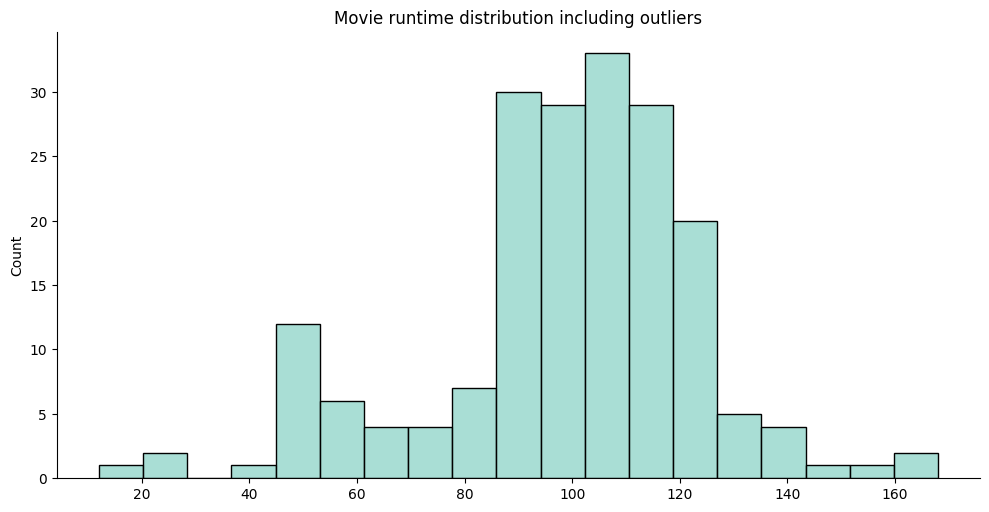

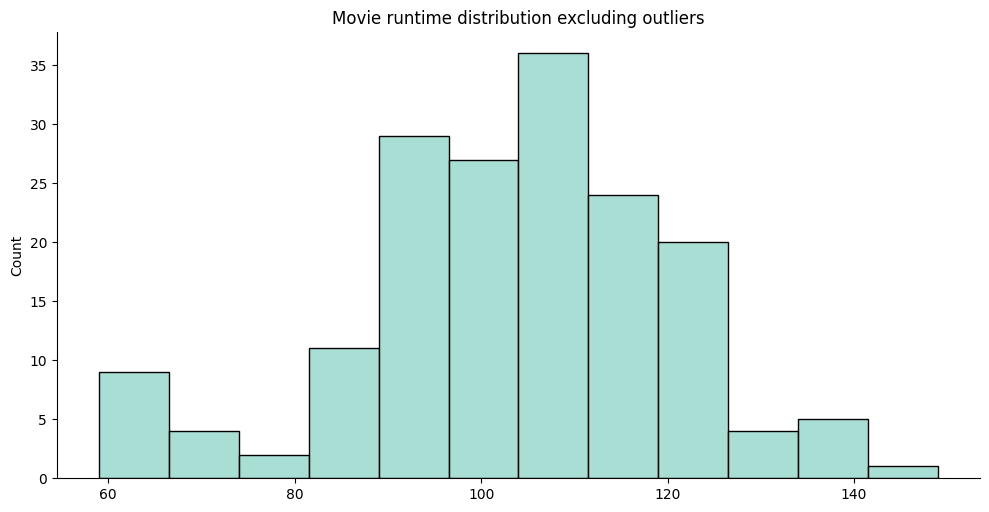

In [56]:
anime_movie_runtime = anime[(anime["type"] == "Movie") & (anime["episodes"] == 1)]

anime_movie_runtime_filtered = iqr_outlier_strip(anime_movie_runtime,"total_runtime_minutes")

sns.displot(anime_movie_runtime["total_runtime_minutes"] / anime_movie_runtime["episodes"], height = 5, aspect = 2)
plt.title("Movie runtime distribution including outliers")

sns.displot(anime_movie_runtime_filtered["total_runtime_minutes"] / anime_movie_runtime_filtered["episodes"],height = 5, aspect = 2)
plt.title("Movie runtime distribution excluding outliers")

## Bivariate

# SQL

 ## Q1

 ## Q2

 ## Q3

 ## Q4

 ## Q5

 ## Q6

 ## Q7

 ## Q8

 ## Q9

 ## Q10